Importing the dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(7)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data from keras.datasets

In [4]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [8]:
type(X_train)
type(Y_train)

numpy.ndarray

In [9]:
#Shape of the numpy arrays

print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data - 60000 images
Test data - 10000 images

Image Dimension --> 28 * 28
Grayscale image --> 1 channel


In [11]:
#printing the 10th image

print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

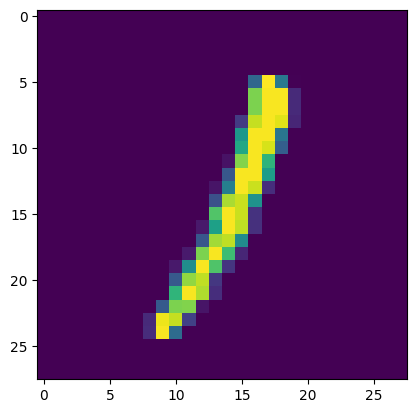

1


In [13]:
#Displaying the image

plt.imshow(X_train[99])
plt.show()

#printing the label

print(Y_train[99])

Image Labels


In [14]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [15]:
#Unique values in Y_train

print(np.unique(Y_train))

#Unique values in Y_test

print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [17]:
# Scaling the values (Normalizing)

X_train = X_train/255
X_test = X_test/255

In [18]:
#printing the 10th image after scaling

print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network

In [20]:
#Setting up the layers of the Neural Network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [22]:
#Compiling the Neural Network

model.compile(optimizer= 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [23]:
#Training the Neural Network

model.fit(X_train, Y_train, epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8432 - loss: 0.5370
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9531 - loss: 0.1604
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9662 - loss: 0.1147
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9732 - loss: 0.0900
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9790 - loss: 0.0726
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9825 - loss: 0.0596
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9856 - loss: 0.0507
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9873 - loss: 0.0435
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9886 - loss: 0.0377
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9897 - loss: 0.0342


Training Data Accuracy = 98.87%

In [25]:
#Accuracy on test data

loss, accuracy = model.evaluate(X_test,Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9677 - loss: 0.1223
0.97079998254776


Test Data Accuracy = 97.07%

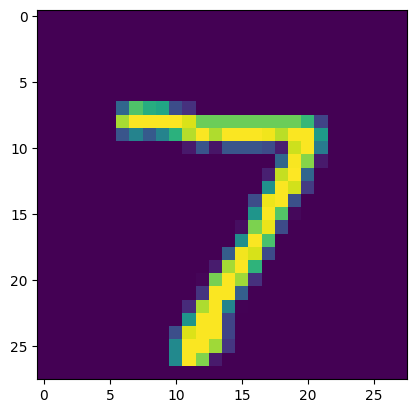

7


In [27]:
#first image data in X_test

plt.imshow(X_test[0])
plt.show()
print(Y_test[0])

In [28]:
Y_pred = model.predict(X_test)
print(Y_pred.shape)
print(Y_pred[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(10000, 10)
[6.1972230e-04 3.3710157e-06 5.9708411e-01 9.6748608e-01 9.2801331e-09
 1.1069602e-04 4.8837063e-13 9.9999791e-01 1.1803909e-03 1.7513586e-02]


model.predict() gives the prediction probability of each class of the data

In [29]:
#Converting prediction probabilities to class label

label_for_first_image = np.argmax(Y_pred[0])
print(label_for_first_image)

7


In [31]:
#Converting the prediction probabilities to class label for all data points

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred)
print(Y_pred_labels)

[[6.19722297e-04 3.37101574e-06 5.97084105e-01 ... 9.99997914e-01
  1.18039094e-03 1.75135862e-02]
 [3.83652627e-01 1.36235449e-02 1.00000000e+00 ... 5.96807331e-06
  6.11494072e-02 2.63067932e-06]
 [4.74266972e-06 9.99859750e-01 6.56940043e-03 ... 4.57362622e-01
  5.58854461e-01 2.82569900e-02]
 ...
 [5.20282810e-11 3.45974149e-06 7.83177327e-08 ... 6.49906173e-02
  1.24372134e-03 9.73965645e-01]
 [2.85964110e-04 3.81751806e-06 8.41823581e-04 ... 4.16524534e-04
  9.98654366e-01 1.34429412e-09]
 [7.09460946e-05 1.05760955e-05 1.34204782e-03 ... 1.44955027e-06
  2.02543248e-04 9.26071698e-06]]
[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 2, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 4, 9, 0, 5, 8, 5, 6, 6, 5, 

Y_test --> True Labels

Y_pred_labels --> Predicted Labels

CONFUSION MATRIX

In [32]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 969    0    4    1    0    1    1    1    3    0]
 [   0 1116    4    2    0    1    1    2    9    0]
 [   3    0 1015    2    3    0    1    3    5    0]
 [   1    0   10  988    0    2    0    1    3    5]
 [   1    0    7    0  955    0    5    3    3    8]
 [   2    0    0   19    1  848    8    0    8    6]
 [   4    3    1    1    5    7  933    0    4    0]
 [   1    6   23    6    3    0    0  972    6   11]
 [   5    0    8    4    3    2    0    0  949    3]
 [   2    4    0    8   18    4    0    3   11  959]], shape=(10, 10), dtype=int32)


Text(0.5, 36.72222222222221, 'Predicted Label')

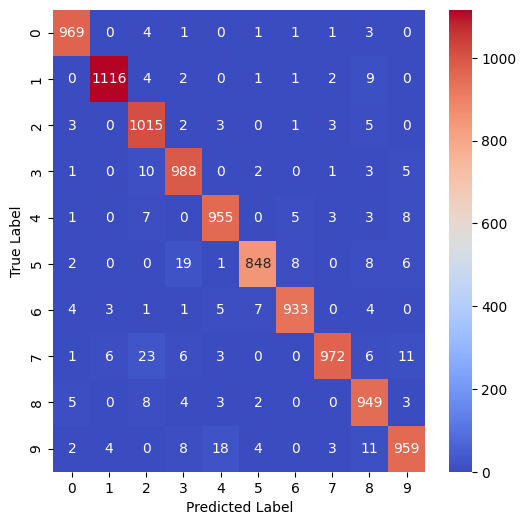

In [37]:
plt.figure(figsize = (6,6))
sns.heatmap(conf_mat, annot = True, fmt = 'd', cmap = 'coolwarm')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

Building a Predictive System

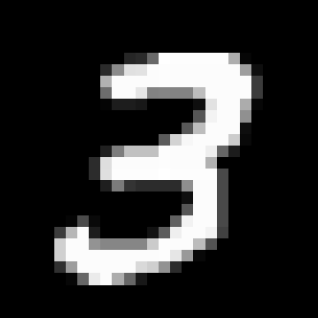

In [38]:
input_image_path = ("/content/MNIST_digit.png")

input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)

In [42]:
type(input_image)

numpy.ndarray

In [43]:
input_image.shape

(318, 318, 3)

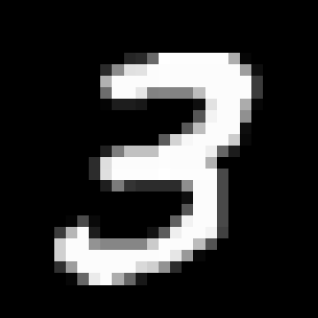

In [44]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
cv2_imshow(grayscale)

In [45]:
grayscale.shape

(318, 318)

In [47]:
input_image_resize = cv2.resize(grayscale, (28,28))
input_image_resize.shape

(28, 28)

In [48]:
cv2_imshow(input_image_resize)

In [49]:
input_image_resize = input_image_resize/255


In [50]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])
image_reshaped.shape

(1, 28, 28)

In [51]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[1.7704531e-15 3.1370579e-03 5.6779957e-01 1.0000000e+00 2.6128386e-16
  5.9691947e-03 1.1180528e-20 1.1065072e-06 4.2227790e-02 3.2710603e-03]]


In [52]:
input_prediction_label = np.argmax(input_prediction)
print(input_prediction_label)

3


Path of the image to be predicted:/content/mnist_5_orig.png


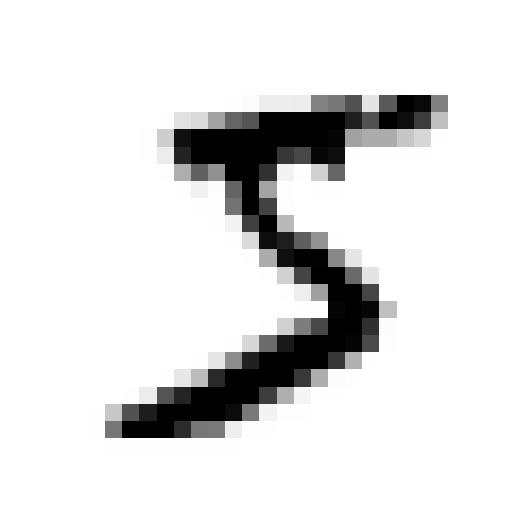

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
The handwritten digit is  5


In [60]:
input_image_path = input("Path of the image to be predicted:")

input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
input_image_resize = cv2.resize(grayscale, (28,28))
input_image_resize = input_image_resize/255
image_reshaped = np.reshape(input_image_resize, [1,28,28])
input_prediction = model.predict(image_reshaped)
input_prediction_label = np.argmax(input_prediction)
print("The handwritten digit is ", input_prediction_label)